In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch,VerticalPitch,FontManager
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup
import json
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from matplotlib import gridspec
from highlight_text import ax_text,fig_text
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.patches import FancyArrowPatch


In [ ]:
# match id from fotmob

enter_id: 4446283


In [4]:
#whoscored match link

In [8]:
url1=input("enter the url: ")


enter the url: https://1xbet.whoscored.com/Matches/1809761/Live/Europe-Champions-League-2023-2024-Real-Madrid-Manchester-City


In [9]:
res1=requests.get(url1,headers={'User-Agent':"Mozilla/5.0"})

In [49]:
soup1=BeautifulSoup(res1.content,"lxml")
scripts1=soup1.find_all("script")

strings=scripts1[24].string




In [ ]:
# capture the  event data from whoscored

In [11]:
ind_start=strings.index("matchCentreData:")+17
ind_end=strings.index(",\r\n            matchCentreEventTypeJson")
json_data=strings[ind_start:ind_end]
data=json.loads(json_data)
home_id=data["home"]['teamId']
away_id=data["away"]['teamId']
home_name=data['home']['name']
away_name=data['away']['name']
stadium=data['venueName']
date=data['timeStamp'].split(" ")[0]
team_name=pd.DataFrame(data={'teamId':[home_id,away_id],'team':[home_name,away_name]},index=[0,1])
event=data["events"]
player=data["playerIdNameDictionary"]
home_number=data["home"]['formations'][0]["jerseyNumbers"]
home_player_id=data["home"]['formations'][0]["playerIds"]

home_num=pd.DataFrame(home_player_id,index=home_number)

away_number=data["away"]['formations'][0]["jerseyNumbers"]
away_player_id=data["away"]['formations'][0]["playerIds"]
away_num=pd.DataFrame(away_player_id,index=away_number)
away_num.reset_index(inplace=True)

home_num.reset_index(inplace=True)
away_num.columns=["jersy_no","playerId"]
home_num.columns=["jersy_no","playerId"]
merge_jersey=pd.concat([home_num,away_num],axis=0)
merge_jersey['playerId']=merge_jersey['playerId'].apply(lambda x:float(x))
score=data['score']
df1=pd.DataFrame(event)
df10=pd.Series(player)
df10=pd.DataFrame(df10)
df10.reset_index(inplace=True)


df10.columns=["playerId","player_name"]
df10['playerId']=df10['playerId'].apply(lambda x:float(x))
df10=pd.merge(df10,merge_jersey,how="inner",on="playerId")






data1=df1.merge(df10,how="left",on="playerId")

In [13]:
data1.head()

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,relatedEventId,relatedPlayerId,cardType,goalMouthZ,goalMouthY,isGoal,isShot,blockedX,blockedY,isOwnGoal,player_name,jersy_no
0,2.670323e+09,2,0,0,52,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.670323e+09,2,0,0,167,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.670323e+09,3,0,0,167,50.0,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 37, 215, 218]",True,93894.0,27.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mateo Kovacic,8.0
3,2.670323e+09,4,0,5,167,28.5,42.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 140, 'displayName': 'PassE...","[91, 119, 117, 127, 205, 36, 38, 217, 218]",True,133569.0,69.3,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stefan Ortega,18.0
4,2.670323e+09,5,0,8,167,69.3,14.4,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 140, 'displayName': 'PassE...","[91, 120, 29, 35, 37, 216, 218]",True,315227.0,60.6,21.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Erling Haaland,9.0


In [14]:
# data  from fotmob
match_id=input('enter_id: ')
url = 'https://www.fotmob.com/api/matchDetails?matchId='+match_id
payload = {}
headers={}
response = requests.request("GET",url,headers=headers,data=payload)
data=response.json()
general=pd.DataFrame(data['content']["stats"]['Periods']['All']['stats'][0]['stats'])
data2=pd.DataFrame(data['content']['shotmap']['shots'])

data2=data2[['id',"eventType",'x','y','playerName','min','minAdded','expectedGoals','expectedGoalsOnTarget','shotType','situation','period','teamId',"isOwnGoal"]]
for x,values in data["general"].items():
    if x=="homeTeam":
        team1=pd.DataFrame(values,index=[0])
    elif x=="awayTeam":
        team2=pd.DataFrame(values,index=[1])
    else:
        pass
        
    
teams=pd.concat([team1,team2],axis=0)
home=teams['name'].unique()[0]
away=teams["name"].unique()[1]
data2=pd.merge(data2,teams,how="left",left_on='teamId',right_on='id')
data2=data2.rename(columns={"expectedGoals":"xG","expectedGoalsOnTarget":"xGOT","name":"team"})
data2['minAdded']=data2['minAdded'].fillna(0)
data2['minute']=data2['min']+data2['minAdded']
data2['xG']=data2['xG'].fillna(0)


In [48]:
data2.head()

,id_x,eventType,x,y,playerName,min,minAdded,xG,xGOT,shotType,situation,period,teamId,isOwnGoal,team,id_y,minute
0,2670324249,Goal,80.795631,50.236433,Bernardo Silva,2,0.0,0.029065,0.1165,LeftFoot,FreeKick,FirstHalf,8456,False,Manchester City,8456,2.0
1,2670328191,AttemptSaved,100.543103,44.981656,Erling Haaland,7,0.0,0.071375,0.1621,LeftFoot,RegularPlay,FirstHalf,8456,False,Manchester City,8456,7.0
2,2670328257,AttemptSaved,92.400000,37.768000,Jack Grealish,7,0.0,0.071638,NaN,RightFoot,RegularPlay,FirstHalf,8456,False,Manchester City,8456,7.0
3,2670334001,Goal,18.110294,41.945937,Ruben Dias,12,0.0,0.000000,NaN,RightFoot,RegularPlay,FirstHalf,8456,True,Manchester City,8456,12.0
4,2670362023,Miss,77.304369,21.126624,Eduardo Camavinga,12,0.0,0.013516,NaN,LeftFoot,RegularPlay,FirstHalf,8633,False,Real Madrid,8633,12.0


In [16]:
#for cleaning whoscored data

In [17]:
#data1["period"]=data1["period"].apply(lambda x: str(x))
#data1["period"].str.split(":",n=3,expand=True)[2].str.strip("}")
def clean1(x):
    cleandata=x.apply(lambda x:str(x))
    cleandata=cleandata.str.split(":",n=3,expand=True)[2]
    cleandata=cleandata.str.replace("[^a-zA-z0-9]","",regex=True)
    return cleandata
    

data1["type"]=clean1(data1["type"])
data1["outcomeType"]=clean1(data1["outcomeType"])
data1["period"]=clean1(data1["period"])
data1["teamId"].unique()

array([ 52, 167], dtype=int64)

In [18]:

data1=pd.merge(data1,team_name,how='left',on='teamId')
data1["jersy_no1"]=data1["jersy_no"].fillna(0.0)
data1["jersy_no1"]=data1["jersy_no1"].apply(lambda x: int(x))
data1['jersy_no1'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1604 entries, 0 to 1603
Series name: jersy_no1
Non-Null Count  Dtype
--------------  -----
1604 non-null   int64
dtypes: int64(1)
memory usage: 12.7 KB


In [50]:
#  all code for viasualization

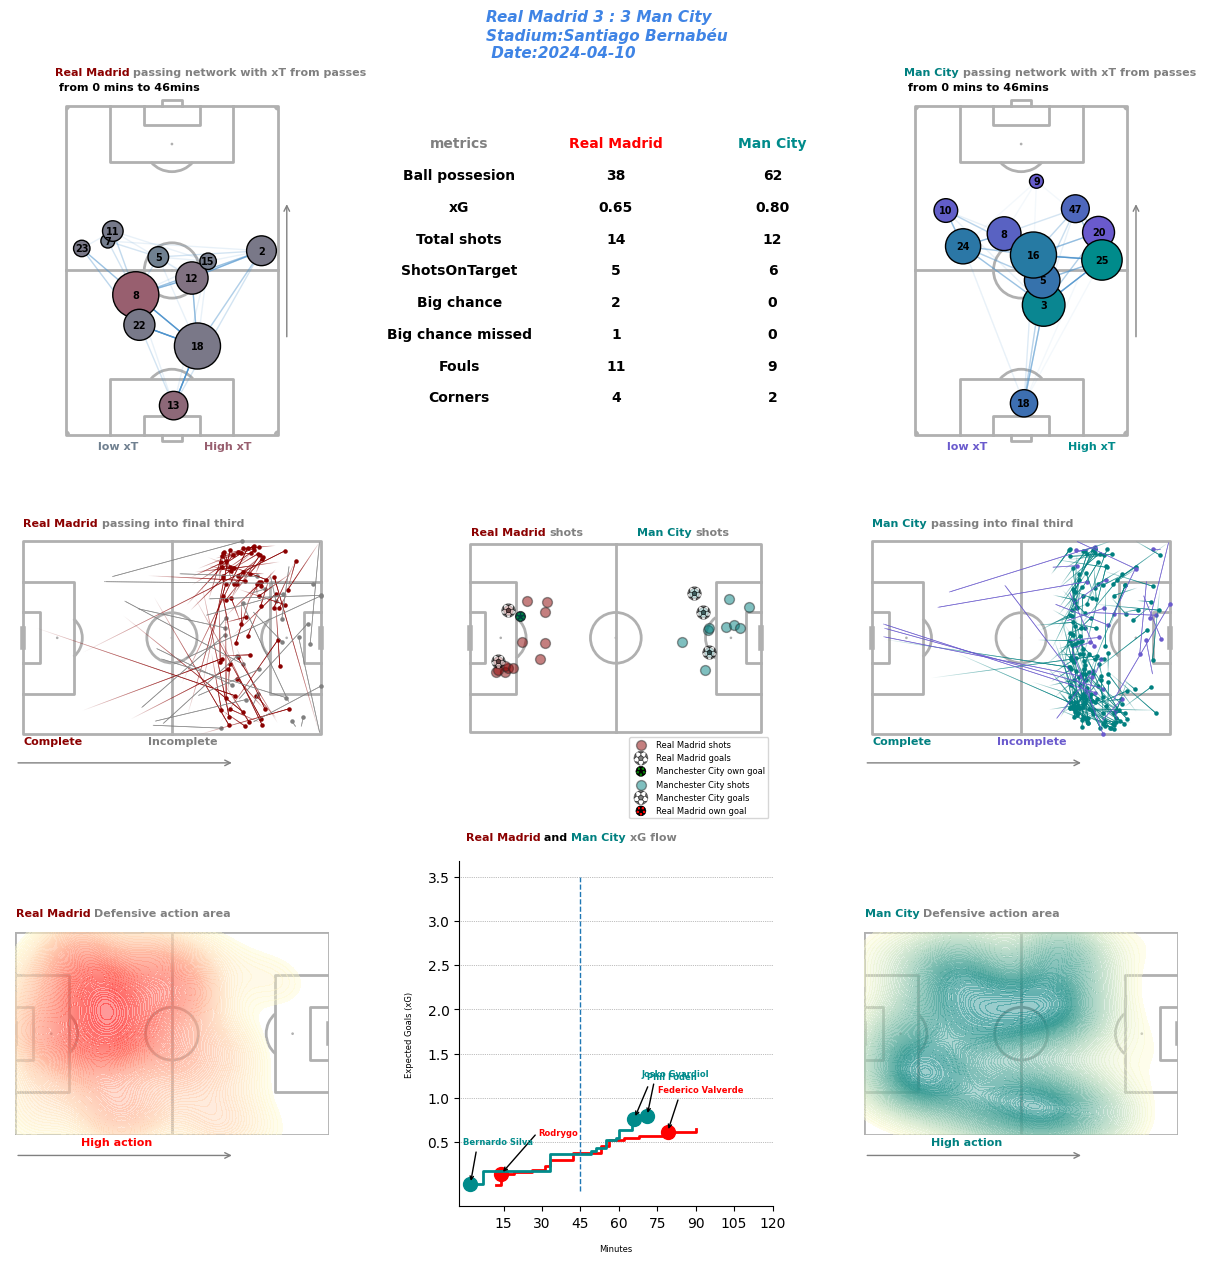

In [46]:
fig=plt.figure(figsize=(12,12),facecolor="white",layout='constrained',dpi=100)
gs=fig.add_gridspec(nrows=3,ncols=3)
fig.text(s=f'{home_name} {score} {away_name}\nStadium:{stadium}\n Date:{date}',x=.4,y=1,size=11,fontweight='bold',
         color='#3F84E5',style='oblique')

#shot plot home & away
ax1=plt.subplot(gs[4])
shot_map(data2,home,away,ax=ax1)
ax_text(x=.1, y=-6,
              s=f'<{home_name}> <shots>',
              highlight_textprops=[{"color": '#8B0000'},
                                   {"color": 'grey'}],
              ax=ax1, weight = "bold",size=8)
ax_text(x=60, y=-6,
              s=f'<{away_name}> <shots>',
              highlight_textprops=[{"color": '#008080'},
                                   {"color": 'grey'}],
              ax=ax1, weight = "bold",size=8)


#passing network home
ax3=plt.subplot(gs[0])
cmap=matplotlib.colors.LinearSegmentedColormap.from_list('custom cmap',['#708090','#985F6F'])
#for low to high xt
ax_text(x=85, y=-2,
              s=f'<low xT>                 <High xT>',
              highlight_textprops=[{"color": '#708090'},
                                   {"color": '#985F6F'}],
              ax=ax3, weight = "bold",size=8)
passing_network(data1,home_name,ax=ax3,x=cmap,m=0,n=46)
ax_text(x=105, y=112,
              s=f'<{home_name}> <passing network with xT from passes>\n from 0 mins to 46mins',
              highlight_textprops=[{"color": '#8B0000'},
                                   {"color": 'grey'}],
              ax=ax3, weight = "bold",size=8)

#passing networek away
ax4=plt.subplot(gs[2])
cmap1=matplotlib.colors.LinearSegmentedColormap.from_list('custom cmap',['#6A5ACD',"#008B8B"])
#for low to high xt
ax_text(x=85, y=-2,
        s=f'<low xT>                     <High xT>',
              highlight_textprops=[{"color": '#6A5ACD'},
                                   {"color": "#008B8B"}],
              ax=ax4, weight = "bold",size=8)
passing_network(data1,away_name,ax=ax4,x=cmap1,m=0,n=46)
ax_text(x=105, y=112,
              s=f'<{away_name}> <passing network with xT from passes>\n from 0 mins to 46mins',
              highlight_textprops=[{"color": '#008080'},
                                   {"color": 'grey'}],
              ax=ax4, weight = "bold",size=8)

# final third passing home
#ax6=plt.subplot(gs[3])
#final_third(data1,home_name,ax=ax6)
#ax_text(x=100, y=105,
             # s=f'<{home}> <passing in final third>',
              #highlight_textprops=[{"color": '#8B0000'},
                                   #{"color": 'grey'}],
              #ax=ax6, weight = "bold",size=6)

# final third passing away
#ax8=plt.subplot(gs[5])
#final_third(data1,away_name,ax=ax8)
#ax_text(x=100, y=105,s=f'<{away}> <passing in final third>',
              #highlight_textprops=[{"color": '#008080'},
                                   #{"color": 'grey'}],
              #ax=ax8, weight = "bold",size=6)
# in to final third home
ax9=plt.subplot(gs[3])
final_into_third(data1,home_name,ax=ax9,x='#8B0000',y='grey')
ax_text(x=.1, y=112,
              s=f'<{home_name}> <passing into final third>',
              highlight_textprops=[{"color": '#8B0000'},
                                   {"color": 'grey'}],
              ax=ax9, weight = "bold",size=8)
ax_text(x=.1, y=-1,
              s=f'<Complete>                 <Incomplete>',
              highlight_textprops=[{"color":'#8B0000'},
                                   {"color": 'grey'}],
              ax=ax9, weight = "bold",size=8)
# in to final third away
ax11=plt.subplot(gs[5])
final_into_third(data1,away_name,ax=ax11,x='#008080',y='#6A5ACD')
ax_text(x=.1, y=112,
              s=f'<{away_name}> <passing into final third>',
              highlight_textprops=[{"color": '#008080'},
                                   {"color": 'grey'}],
           ax=ax11, weight ="bold",size=8)
ax_text(x=.1, y=-1,
              s=f'<Complete>                 <Incomplete>',
              highlight_textprops=[{"color":'#008080'},
                                   {"color": '#6A5ACD'}],
              ax=ax11, weight = "bold",size=8)
# defensive action home team
ax12=plt.subplot(gs[6])
custommap1=matplotlib.colors.LinearSegmentedColormap.from_list('custom cmap',["#FFFDD0",'red'])
defensive_action(data1,home_name,ax=ax12,x=custommap1)
ax_text(x=.1, y=112,
              s=f'<{home_name}> <Defensive action area>',
              highlight_textprops=[{"color": '#8B0000'},
                                   {"color": 'grey'}],
              ax=ax12, weight = "bold",size=8)
ax_text(x=.1, y=-1,
              s=f'                 <High action>',
              highlight_textprops=[
                                   {"color": 'red'}],
              ax=ax12, weight = "bold",size=8)
# defensive action away
ax12=plt.subplot(gs[8])
custommap2=matplotlib.colors.LinearSegmentedColormap.from_list('custom cmap',["#FFFDD0","#008080"])
defensive_action(data1,away_name,ax=ax12,x=custommap2)
ax_text(x=.1, y=112,
              s=f'<{away_name}> <Defensive action area>',
              highlight_textprops=[{"color": '#008080'},
                                   {"color": 'grey'}],
              ax=ax12, weight = "bold",size=8)
ax_text(x=.1, y=-1,
              s=f'                 <High action>',
              highlight_textprops=[
                                   {"color": '#008080'}],
              ax=ax12, weight = "bold",size=8)
#xg flow
ax13=plt.subplot(gs[7])
xg_flow(data2,home,away,ax=ax13)
ax_text(x=.1, y=4,
              s=f'<{home_name}> and <{away_name}> <xG flow>',
              highlight_textprops=[{"color": '#8B0000'},{'color':'#008080'},
                                   {"color": 'grey'}],
              ax=ax13, weight = "bold",size=8)


ax14=plt.subplot(gs[1])
stats(general,ax=ax14)

In [45]:
#shot function

In [19]:
def shot_map(df,home,away,ax):
    home_df=df.loc[df['team']==home].copy()
    away_df=df.loc[df['team']==away].copy()
    home_goals = home_df[(home_df['eventType'] == 'Goal')&(home_df['isOwnGoal']==False)].copy()
    away_goals = away_df[(away_df['eventType'] == 'Goal')&(away_df['isOwnGoal']==False)].copy()
    pitch=Pitch(pitch_type='uefa',pitch_color="white")
    pitch.draw(ax=ax)
    ax.invert_yaxis()
    # Home team shots and goals
    home_shot=pitch.scatter(x=105-home_df[home_df['period']!='PenaltyShootout']['x'], y=home_df[home_df['period']!='PenaltyShootout']['y'], s=50, ec='#2b2b2b', alpha=0.5, ax=ax, zorder=1,c='#8B0000',marker='o',label=f'{home} shots')
    home_goal=pitch.scatter(x=105-home_goals[home_goals['period']!='PenaltyShootout']['x'], y=home_goals[home_goals['period']!='PenaltyShootout']['y'], s=100, marker='football', zorder=1, ax=ax,alpha=.5,label=f'{home} goals')
     # Away team own goals
    away_own=pitch.scatter(away_df[away_df['isOwnGoal']==True]['x'], 68-away_df[away_df['isOwnGoal']==True]['y'], s=50, marker='football', zorder=1, ax=ax,label=f'{away} own goal',c='green')
     # away team shots and goals
    away_shot=pitch.scatter(x=away_df[away_df['period']!='PenaltyShootout']['x'], y=68-away_df[away_df['period']!='PenaltyShootout']['y'], s=50, ec='#2b2b2b', alpha=0.5, ax=ax, zorder=1,c='#008080',marker='o',label=f'{away} shots')
    away_goal=pitch.scatter(x=away_goals[away_goals['period']!='PenaltyShootout']['x'], y=68-away_goals[away_goals['period']!='PenaltyShootout']['y'], s=100, marker='football', zorder=1, ax=ax,alpha=.5,label=f'{away} goals')
    
     # Away team own goals
    home_own=pitch.scatter(105-home_df[home_df['isOwnGoal']==True]['x'], home_df[home_df['isOwnGoal']==True]['y'], s=50, marker='football', zorder=1, ax=ax,c='red',label=f'{home} own goal')
    legend=ax.legend(bbox_to_anchor=(1,.05),fontsize=6)
    
    return home_shot,home_goal,away_own,away_goal,away_shot,home_own

    

In [20]:
#final third passing
def final_third(df,team,ax):
    sucessful=df.loc[(df['team']==team)&(df["type"]=="Pass")&(df['x']>66)&(df['endX']>66)&(df['outcomeType']=='Successful')].copy()
    unsucesful=df.loc[(df['team']==team)&(df["type"]=="Pass")&(df['x']>66)&(df['endX']>66)&(df['outcomeType']!='Successful')].copy()
    pitch=VerticalPitch(pitch_type='opta',pitch_color="white",half=True)
    pitch.draw(ax=ax)
    
    lines1=pitch.lines(sucessful['x'],sucessful['y'],sucessful['endX'],sucessful['endY'],ax=ax,color='#708090',lw=.5,transparent=True,label="successful")
    lines2=pitch.lines(unsucesful['x'],unsucesful['y'],unsucesful['endX'],unsucesful['endY'],ax=ax,color='#FF0000',lw=.5,transparent=True,label="unsuccessful",alpha=.8)
    scatter1=pitch.scatter(sucessful['endX'],sucessful['endY'],ax=ax,color='#708090',s=5)
    scatter2=pitch.scatter(unsucesful['endX'],unsucesful['endY'],ax=ax,color='#FF0000',s=5)
    ax.legend(facecolor='#FFFDD0', edgecolor='None', fontsize=5, loc='lower left', handlelength=4)
    
    
    return lines1,lines2,scatter1,scatter2

In [21]:
#passing into the final third
def final_into_third(df,team,ax,x,y):
    sucessful=df.loc[(df['team']==team)&(df["type"]=="Pass")&(df['endX']>66)&(df['outcomeType']=='Successful')].copy()
    unsucesful=df.loc[(df['team']==team)&(df["type"]=="Pass")&(df['endX']>66)&(df['outcomeType']!='Successful')].copy()
    pitch=Pitch(pitch_type='opta',pitch_color="white")
    pitch.draw(ax=ax)
    lines1=pitch.lines(sucessful['x'],sucessful['y'],sucessful['endX'],sucessful['endY'],ax=ax,color=x,lw=.5,transparent=True,label="successful")
    lines2=pitch.lines(unsucesful['x'],unsucesful['y'],unsucesful['endX'],unsucesful['endY'],ax=ax,color=y,lw=.5,transparent=True,label="unsuccessful",alpha=.8)
    scatter1=pitch.scatter(sucessful['endX'],sucessful['endY'],ax=ax,color=x,s=5)
    scatter2=pitch.scatter(unsucesful['endX'],unsucesful['endY'],ax=ax,color=y,s=5)
    ax.annotate('', xy=(.7, -0.1), xycoords='axes fraction', xytext=(0, -0.1), 
            arrowprops=dict(arrowstyle="->", color='grey'))
  
    return lines1,lines2,scatter1,scatter2

In [22]:
#defensive function
def defensive_action(df,team,ax,x):
    
    df=df.loc[(df['type'].isin(['BallRecovery','Tackle', 'Interception','Foul','Clearance','Challenge']))&(df['team']==team)].copy()
    pitch=Pitch(pitch_type='opta',pitch_color="white")
    pitch.draw(ax=ax)
    
    kde=sns.kdeplot(x=df['x'],y=df['y'],cmap=x,ax=ax,fill=True,levels=100,zorder=1,alpha=.4,cut=10)
    plt.xlim(0,100)
    plt.ylim(0,100)
    ax.annotate('', xy=(.7, -0.1), xycoords='axes fraction', xytext=(0, -0.1), 
            arrowprops=dict(arrowstyle="->", color='grey'))
    
    return kde
    
    

In [44]:
#create  passing network
def passing_network(df,team,ax,x,m,n):
    df=df.loc[df['team']==team]
    
            
    
    
    df["passer"]=df["jersy_no1"]
    
    df["recipiant"]=df["passer"].shift(-1)
    
    
    sub=df.loc[(df['type']=='SubstitutionOff')]['minute'].min()
   
    
    df=df.loc[(df['type']=='Pass')&(df['outcomeType']=='Successful')&(df["minute"].between(m,n))]
    

    
    xT=pd.read_csv('xT_Grid.csv',header=None)
    xT=np.array(xT)
    cols=xT.shape[1]
    rows=xT.shape[0]
    df=df.copy()
    df.loc[:, "x_bin"] = pd.cut(df["x"], bins=cols, labels=False)
    df.loc[:, "y_bin"] = pd.cut(df["y"], bins=rows, labels=False)
    df.loc[:, "x1_bin"] = pd.cut(df["endX"], bins=cols, labels=False)
    df.loc[:, "y1_bin"] = pd.cut(df["endX"], bins=rows, labels=False)

    # Calculate start and end zone values
    df.loc[:, "start_zone_value"] = df[["x_bin","y_bin"]].apply(lambda row: xT[row[1]][row[0]], axis=1)
    df.loc[:, "end_zone_value"] = df[["x1_bin","y1_bin"]].apply(lambda row: xT[row[1]][row[0]], axis=1)
    df.loc[:, "XT"] =df["end_zone_value"] - df["start_zone_value"]

    average_loc=df.groupby("passer").agg({"x":["median"],"y":["median","count"],"XT":["sum"]})
    average_loc.columns=["x","y","pass_count","XT"]
    pass_between=df.groupby(["passer",'recipiant']).id.count().reset_index()
    pass_between.rename({"id":"pass_count"},axis="columns",inplace=True)
    pass_between=pass_between.merge(average_loc,left_on="passer",right_index=True)
    pass_between=pass_between.merge(average_loc,left_on="recipiant",right_index=True,suffixes=["","_end"])
    def normalization(x):
        
        return (x-x.min())/(x.max()-x.min())
    pass_between["normalization_pass"]=normalization(pass_between["pass_count_x"])
    average_loc["normalization_xt"]=normalization(average_loc["XT"])
    average_loc['normalization_pass']=normalization(average_loc['pass_count'])
#drawing a pitch
    pitch=VerticalPitch(pitch_type='opta',corner_arcs=True,goal_type="box",pitch_color="white")
    pitch.draw(ax=ax)
    
    
    arrows=pitch.arrows(pass_between["x"],pass_between["y"],pass_between["x_end"],pass_between["y_end"],ax=ax,color="#4F94CD",width=1,zorder=1,alpha=pass_between["normalization_pass"])
    
            
            
            
    nodes=pitch.scatter(x=average_loc["x"],y=average_loc["y"],s=((average_loc['normalization_pass'])*1000)+100,ax=ax,cmap=x,edgecolor="black",c=average_loc["normalization_xt"])
    average1_loc=average_loc.reset_index()
    
   
   
    for index,row in average1_loc.iterrows():
        
        annotation=pitch.annotate(row.passer.astype(int),xy=(row.x,row.y),ha="center",va="center",size=7,ax=ax,weight="bold")
    ax.annotate('', xy=(1,.7), xycoords='axes fraction', xytext=(1,.3), 
            arrowprops=dict(arrowstyle="->", color='grey'))
   
            
   
 
    return arrows,nodes
 
            
        
    
            
      
         
    


In [25]:
# create XG flow chart
def xg_flow(df,home,away,ax):
    ax.patch.set_facecolor("white")
    #Cumulative Sum xG home team
    h_df = df[(df['team'] == home)&(df['period']!='PenaltyShootout')]
    h_df.sort_values(by='minute', inplace=True)
    h_df['h_cum'] = h_df['xG'].cumsum()

#Cumulative Sum xG away team
    a_df = df[(df['team'] == away)&(df['period']!='PenaltyShootout')]
    a_df.sort_values(by='minute', inplace=True)
    a_df['a_cum'] = a_df['xG'].cumsum()
    h_goal = h_df.loc[(h_df['eventType'].isin(["Goal"]))&(h_df['isOwnGoal']==False)]
    a_goal = a_df[(a_df['eventType'].isin(["Goal"]))&(a_df['isOwnGoal']==False)]
    h_own=h_df.loc[(h_df['eventType'].isin(["Goal"]))&(h_df['isOwnGoal']==True)]
    a_own=a_df[(a_df['eventType'].isin(["Goal"]))&(a_df['isOwnGoal']==True)]
    a_total = round(a_df['xG'].sum(),2).astype(str)
    h_total = round(h_df['xG'].sum(),2).astype(str)
    
    
    step1=ax.step(x = h_df['minute'], y = h_df['h_cum'], where = 'post', color = 'red', label= home   ,linewidth=2)  
    step2=ax.step(x = a_df['minute'], y = a_df['a_cum'], where = 'post', color = '#008B8B', label= away ,linewidth=2)

# Create scatter plot for highlighting the goal
    scatter1=ax.scatter(x= h_goal['minute'], y = h_goal['h_cum'] , marker= 'o', s= 100 ,color =  'red')
    scatter2=ax.scatter(x= a_goal['minute'], y = a_goal['a_cum'] , marker='o', s =100, color = '#008B8B')
    
    plt.vlines(x=45,ymin=-.05,ymax=3.5,ls='--',linewidth=1)
    plt.xticks([15,30,45,60,75,90,105,120])
    plt.yticks([ 0.5, 1, 1.5, 2, 2.5, 3,3.5])
    plt.ylabel("Expected Goals (xG)", fontsize = 6, labelpad = 10)
    plt.xlabel("Minutes", fontsize = 6, labelpad = 10)
    
    ax.grid(ls='dotted',lw=.5,color='grey',axis='y',zorder=1)
    spines = ['top','right']
    for x in spines:
        
        if x in spines:
            ax.spines[x].set_visible(False)
    #set up our base layer
    matplotlib.rcParams['xtick.color'] = 'black'
    matplotlib.rcParams['ytick.color'] = 'black'
    #for home team
    for index,row in  h_goal.iterrows():
        ax.annotate(row.playerName,xy=(row.minute,row.h_cum)
                    ,c="red",ha="right",va="center",size=6,weight='bold',xytext=(55, 30), textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc,armA=-20,rad=3",color="black"))
    #for away
    for index,row in  a_goal.iterrows():
        ax.annotate(row.playerName,xy=(row.minute,row.a_cum)
                    ,c="#008B8B",ha="right",va="center",size=6,weight='bold',xytext=(45, 30), textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc,armA=-20,rad=3",color="black"))
    return step1,step2,scatter1,scatter2

    
        
            
            
            
           
                
    


In [26]:
# stats table
def stats(df,ax):
    df=df.drop(['title','highlighted','type'],axis=1)
    df['stats']=df['stats'].apply(lambda x:str(x))
    df['stats']=df['stats'].str.strip('[]')
    df[[home_name,away_name]]=df['stats'].str.split(',',expand=True,n=2)
    df.rename(columns={'key': 'metrics'}, inplace=True)
    df=df.drop(['stats'],axis=1)
    df['metrics']=df['metrics'].replace({'BallPossesion':'Ball possesion','expected_goals':"xG",'total_shots':'Total shots','big_chance':'Big chance',
                          'big_chance_missed_title':'Big chance missed','accurate_passes':'Accurate passes','fouls':'Fouls','corners':'Corners'})
    df[home_name]=df[home_name].str.strip(" ' ")
    df[away_name]=df[away_name].str.strip(" '  ")
    df=df.drop([6],axis=0)
    
    headers = df.columns.tolist()
    data = df.values.tolist()
    table = ax.table(cellText=data, colLabels=headers, loc='center')
    for (i, j), cell in table.get_celld().items():
        
        if i == 0 and j==1 :
            
            cell.set_text_props(fontweight='bold',color='red')
        
    
        elif i==0 and j==2:
                cell.set_text_props(fontweight='bold',color='#008B8B')
        elif i==0 and j==0:
            
                cell.set_text_props(fontweight='bold',color='grey')
        else:
            cell.set_text_props(fontweight='bold',color='black')
            
            
            
    for key, cell in table.get_celld().items():
        
        cell.set_linewidth(0)  # Set linewidth to 0 for all cells
    for (i, j), cell in table.get_celld().items():
        
        if i == 0:
            cell.set_text_props(fontweight='bold', ha='center')  # ha='center' for horizontal alignment
        else:
            cell.set_text_props(ha='center')   
            
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.5, 1.5)
    ax.axis('off')
    return table

    

        
    
    

    

In [121]:
# regarding invidual performance

    


array([nan, 'Mateo Kovacic', 'Stefan Ortega', 'Erling Haaland', 'Rodrygo',
       'Vinícius Júnior', 'Rúben Dias', 'Jack Grealish', 'Josko Gvardiol',
       'Aurélien Tchouaméni', 'Bernardo Silva', 'Dani Carvajal',
       'Jude Bellingham', 'Eduardo Camavinga', 'Toni Kroos',
       'Manuel Akanji', 'Phil Foden', 'Ferland Mendy', 'Antonio Rüdiger',
       'Andriy Lunin', 'Rodri', 'Federico Valverde', 'John Stones',
       'Brahim Díaz', 'Luka Modric', 'Joselu', 'Julián Álvarez'],
      dtype=object)

array(['Start', 'Pass', 'Aerial', 'BallTouch', 'BallRecovery',
       'KeeperPickup', 'BlockedPass', 'TakeOn', 'Tackle', 'Dispossessed',
       'Foul', 'Challenge', 'Clearance', 'SavedShot', 'Save', 'Goal',
       'CornerAwarded', 'Punch', 'MissedShots', 'ShotOnPost',
       'KeeperSweeper', 'Interception', 'Claim', 'Card', 'OffsideGiven',
       'OffsidePass', 'OffsideProvoked', 'End', 'ShieldBallOpp',
       'SubstitutionOff', 'SubstitutionOn', 'Smother', 'FormationChange',
       'PenaltyFaced', 'FormationSet'], dtype=object)